# Introduction


Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).


### Upgrade Plotly

Run the cell below if you are working with Google Colab


In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


## Import Statements


In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation


In [3]:
pd.options.display.float_format = "{:,.2f}".format

## Load the Data


In [4]:
df_hh_income = pd.read_csv("Median_Household_Income_2015.csv", encoding="windows-1252")
df_pct_poverty = pd.read_csv(
    "Pct_People_Below_Poverty_Level.csv", encoding="windows-1252"
)
df_pct_completed_hs = pd.read_csv(
    "Pct_Over_25_Completed_High_School.csv", encoding="windows-1252"
)
df_share_race_city = pd.read_csv("Share_of_Race_By_City.csv", encoding="windows-1252")
df_fatalities = pd.read_csv("Deaths_by_Police_US.csv", encoding="windows-1252")

# Preliminary Data Exploration

- What is the shape of the DataFrames?
- How many rows and columns do they have?
- What are the column names?
- Are there any NaN values or duplicates?


In [5]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [7]:
print(df_hh_income.head())
print(df_pct_poverty.head())
print(df_pct_completed_hs.head())
print(df_share_race_city.head())
df_fatalities.head()

  Geographic Area             City Median Income
0              AL       Abanda CDP         11207
1              AL   Abbeville city         25615
2              AL  Adamsville city         42575
3              AL     Addison town         37083
4              AL       Akron town         21667
  Geographic Area             City poverty_rate
0              AL       Abanda CDP         78.8
1              AL   Abbeville city         29.1
2              AL  Adamsville city         25.5
3              AL     Addison town         30.7
4              AL       Akron town           42
  Geographic Area             City percent_completed_hs
0              AL       Abanda CDP                 21.2
1              AL   Abbeville city                 69.1
2              AL  Adamsville city                 78.9
3              AL     Addison town                 81.4
4              AL       Akron town                 68.6
  Geographic area             City share_white share_black  \
0              AL   

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [8]:
print(df_hh_income.info())
print(df_pct_poverty.info())
print(df_pct_completed_hs.info())
print(df_share_race_city.info())
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.


In [10]:
print(df_hh_income.duplicated().values.any())
print(df_pct_poverty.duplicated().values.any())
print(df_pct_completed_hs.duplicated().values.any())
print(df_share_race_city.duplicated().values.any())
df_fatalities.duplicated().values.any()

False
False
False
False


np.False_

In [11]:
df_hh_income.fillna(0, inplace=True)
df_pct_poverty.fillna(0, inplace=True)
df_pct_completed_hs.fillna(0, inplace=True)
df_share_race_city.fillna(0, inplace=True)
df_fatalities.fillna(0, inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate? Bar Plot


In [21]:
# Convert poverty_rate to numeric, forcing errors to NaN
df_pct_poverty["poverty_rate"] = pd.to_numeric(
    df_pct_poverty["poverty_rate"], errors="coerce"
)

# Group by state and calculate the mean poverty rate
state_poverty_rate = (
    df_pct_poverty.groupby("Geographic Area")["poverty_rate"].mean().reset_index()
)

# Sort by poverty rate in descending order
state_poverty_rate = state_poverty_rate.sort_values(by="poverty_rate", ascending=False)

state_poverty_rate.head()

,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.67
10,GA,23.78
32,NM,23.08
2,AR,22.96


In [22]:
# Create the bar chart
fig = px.bar(
    state_poverty_rate,
    x="Geographic Area",
    y="poverty_rate",
    title="Poverty Rate by US State",
    labels={"Geographic Area": "State", "poverty_rate": "Poverty Rate"},
    height=600,
)

fig.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?


In [23]:
# Convert percent_completed_hs to numeric, forcing errors to NaN
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(
    df_pct_completed_hs["percent_completed_hs"], errors="coerce"
)

# Group by state and calculate the mean high school graduation rate
state_hs_grad_rate = (
    df_pct_completed_hs.groupby("Geographic Area")["percent_completed_hs"]
    .mean()
    .reset_index()
)

# Sort by high school graduation rate in ascending order
state_hs_grad_rate = state_hs_grad_rate.sort_values(
    by="percent_completed_hs", ascending=True
)

# Create the bar chart
fig = px.bar(
    state_hs_grad_rate,
    x="Geographic Area",
    y="percent_completed_hs",
    title="High School Graduation Rate by US State",
    labels={
        "Geographic Area": "State",
        "percent_completed_hs": "High School Graduation Rate",
    },
    height=600,
)

fig.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.


In [24]:
from plotly.subplots import make_subplots

import plotly.graph_objects as go

# Create a subplot with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(
        x=state_poverty_rate["Geographic Area"],
        y=state_poverty_rate["poverty_rate"],
        name="Poverty Rate",
        mode="lines+markers",
    ),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(
        x=state_hs_grad_rate["Geographic Area"],
        y=state_hs_grad_rate["percent_completed_hs"],
        name="High School Graduation Rate",
        mode="lines+markers",
    ),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Poverty Rates vs High School Graduation Rates by US State"
)

# Set x-axis title
fig.update_xaxes(title_text="State")

# Set y-axes titles
fig.update_yaxes(title_text="Poverty Rate", secondary_y=False)
fig.update_yaxes(title_text="High School Graduation Rate", secondary_y=True)

fig.show()

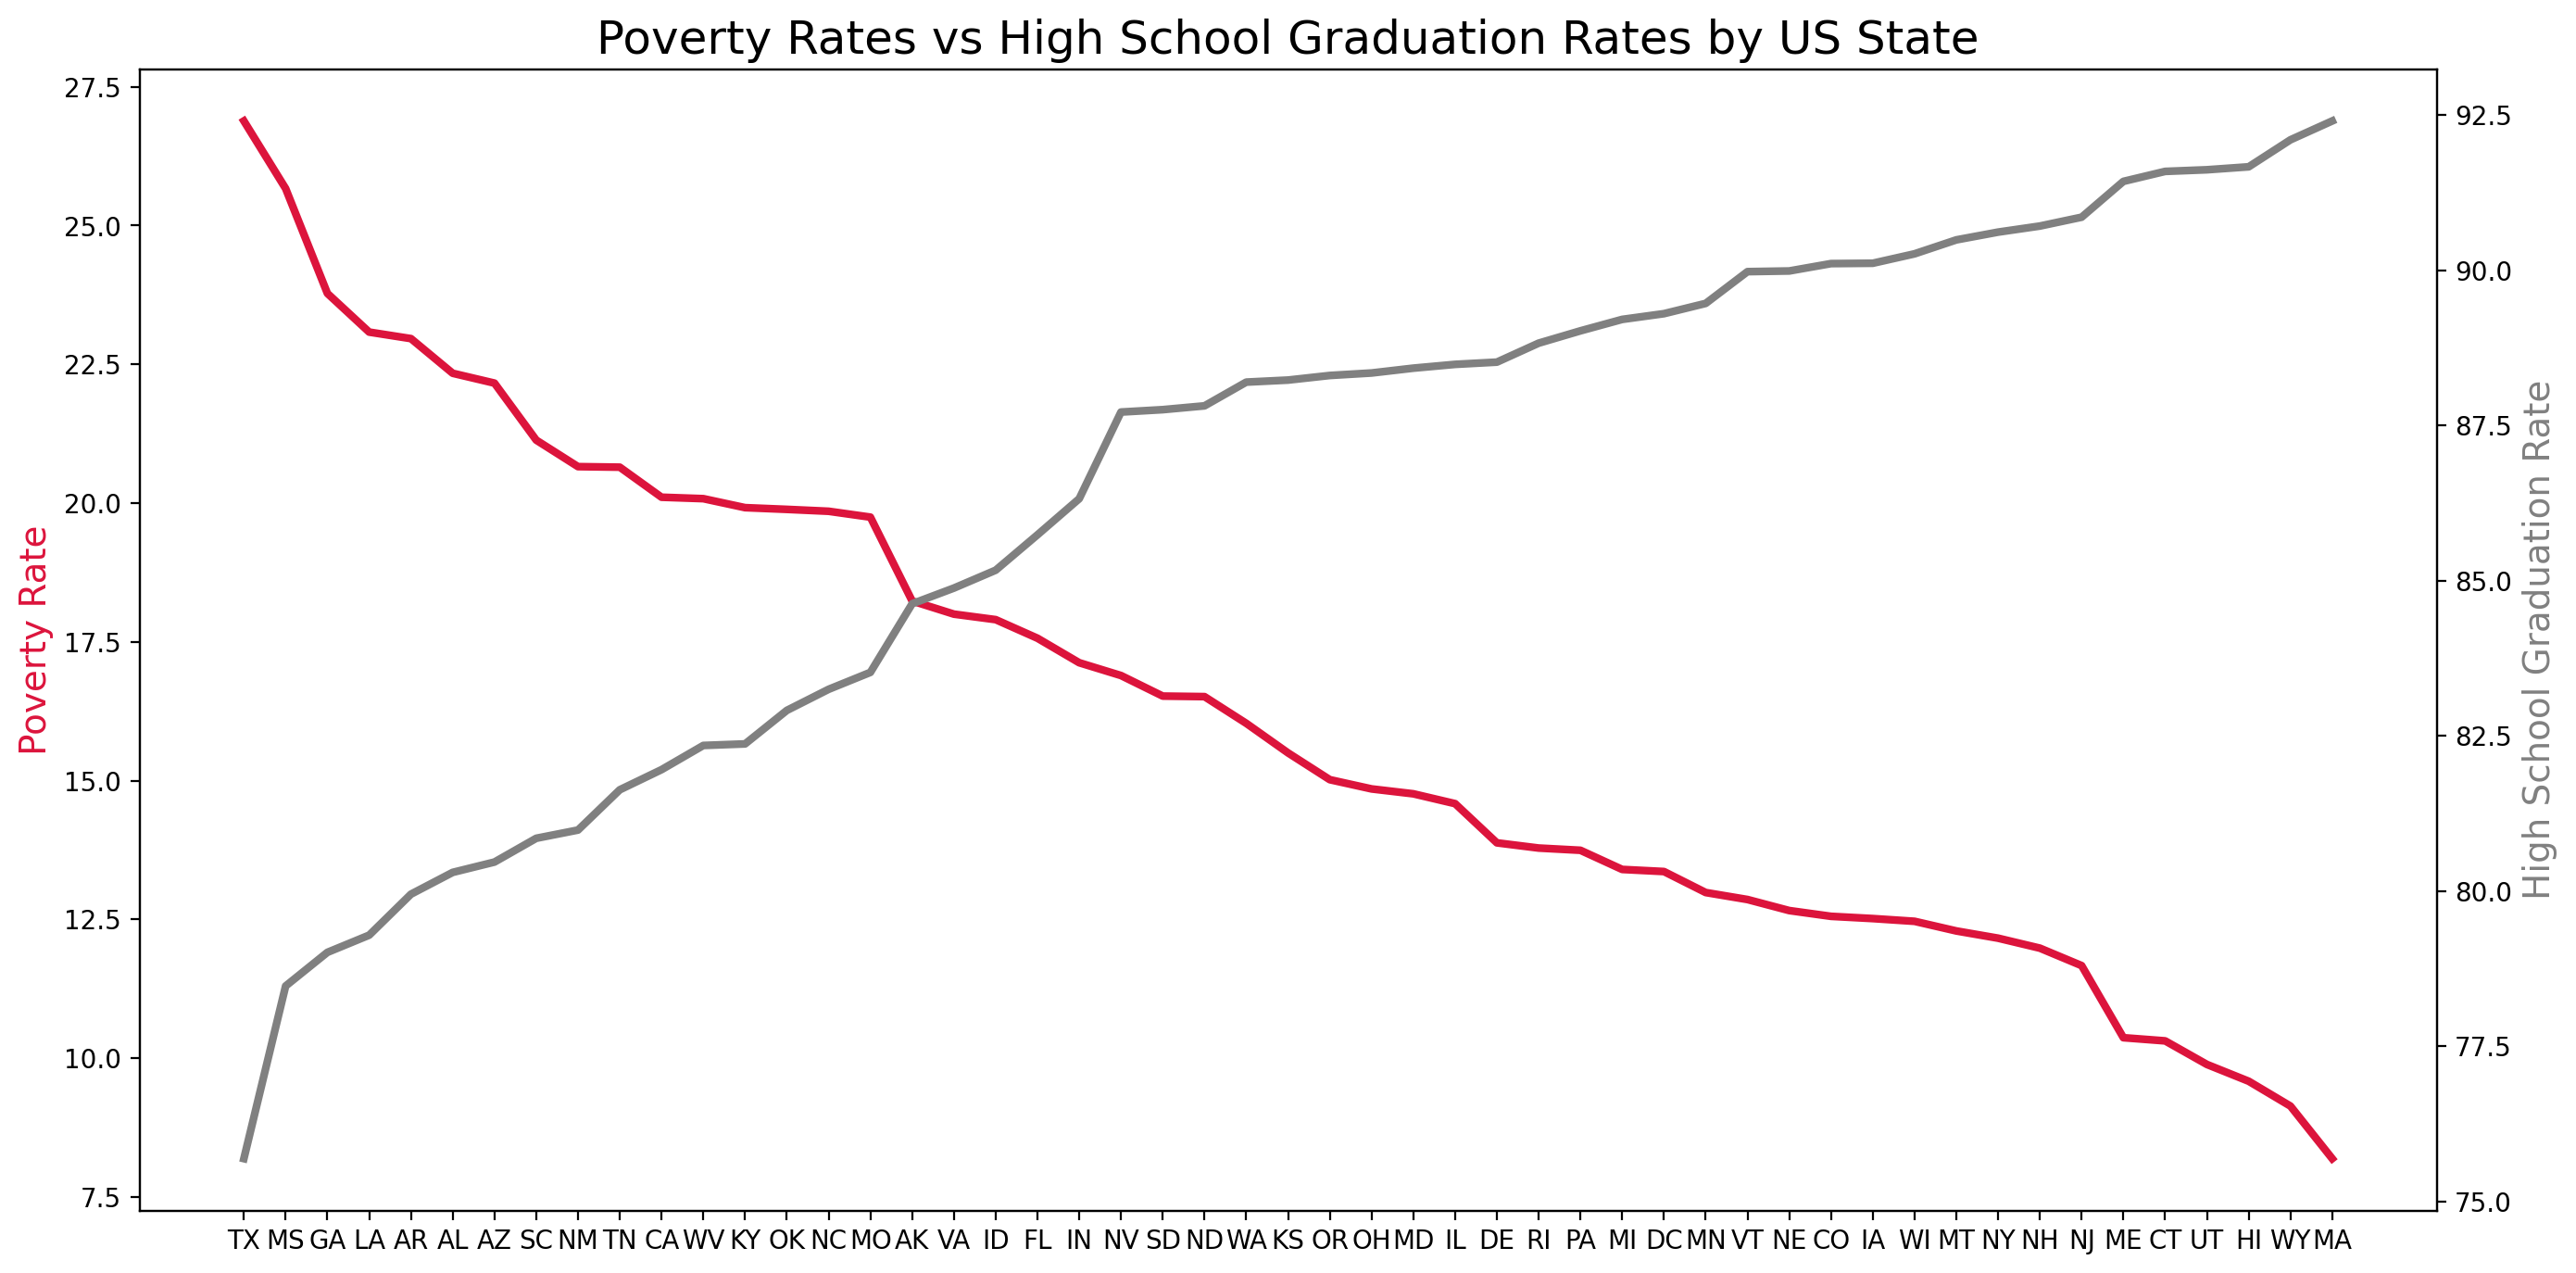

In [28]:
plt.figure(figsize=(16, 8), dpi=200)
plt.title("Poverty Rates vs High School Graduation Rates by US State", fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()  # create second y-axis

ax1.plot(
    state_hs_grad_rate["Geographic Area"],
    state_poverty_rate["poverty_rate"],
    c="crimson",
    linewidth=3,
)
ax1.set_ylabel("Poverty Rate", color="crimson", fontsize=14)
# Adding prize share plot on second axis
ax2.plot(
    state_hs_grad_rate["Geographic Area"],
    state_hs_grad_rate["percent_completed_hs"],
    c="grey",
    linewidth=3,
)
ax2.set_ylabel("High School Graduation Rate", color="grey", fontsize=14)
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship


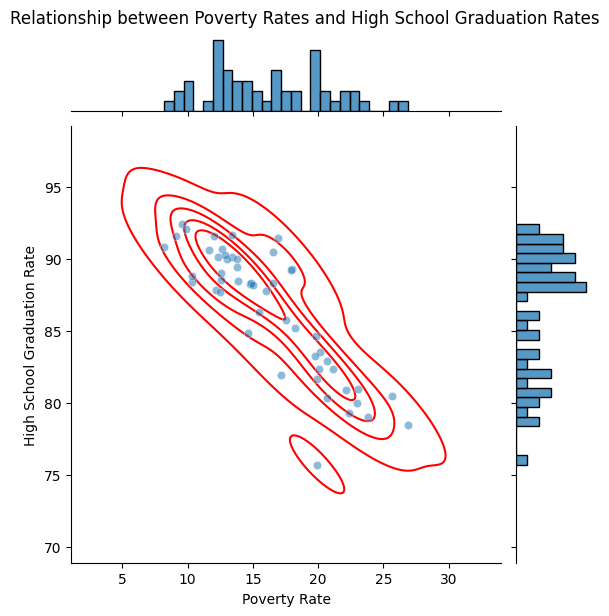

In [29]:
sns.jointplot(
    x=state_poverty_rate["poverty_rate"],
    y=state_hs_grad_rate["percent_completed_hs"],
    kind="scatter",
    marginal_kws=dict(bins=25, fill=True),
    joint_kws=dict(alpha=0.5),
).plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
plt.xlabel("Poverty Rate")
plt.ylabel("High School Graduation Rate")
plt.suptitle(
    "Relationship between Poverty Rates and High School Graduation Rates", y=1.02
)
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.


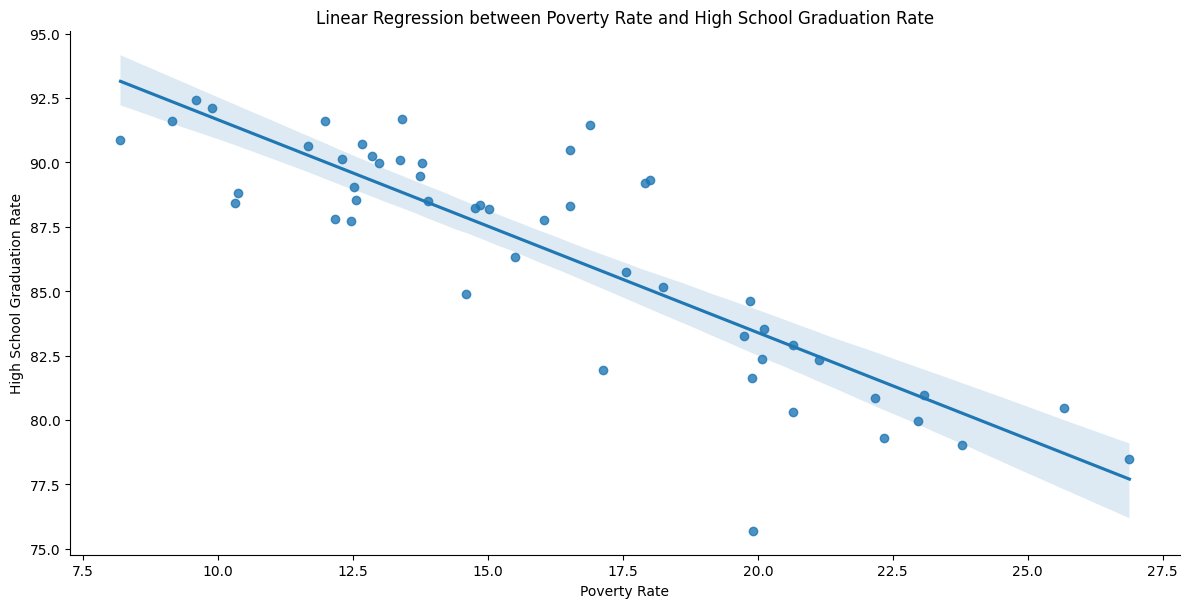

In [30]:
sns.lmplot(
    x="poverty_rate",
    y="percent_completed_hs",
    data=pd.merge(state_poverty_rate, state_hs_grad_rate, on="Geographic Area"),
    aspect=2,
    height=6,
)
plt.xlabel("Poverty Rate")
plt.ylabel("High School Graduation Rate")
plt.title("Linear Regression between Poverty Rate and High School Graduation Rate")
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.


In [36]:
# Convert share columns to numeric
df_share_race_city['share_white'] = pd.to_numeric(df_share_race_city['share_white'], errors='coerce')
df_share_race_city['share_black'] = pd.to_numeric(df_share_race_city['share_black'], errors='coerce')
df_share_race_city['share_native_american'] = pd.to_numeric(df_share_race_city['share_native_american'], errors='coerce')
df_share_race_city['share_asian'] = pd.to_numeric(df_share_race_city['share_asian'], errors='coerce')
df_share_race_city['share_hispanic'] = pd.to_numeric(df_share_race_city['share_hispanic'], errors='coerce')

# Ensure the 'Geographic area' column is not included in the mean calculation
state_race_share = df_share_race_city.groupby('Geographic area').agg({
    'share_white': 'mean',
    'share_black': 'mean',
    'share_native_american': 'mean',
    'share_asian': 'mean',
    'share_hispanic': 'mean'
}).reset_index()

In [37]:
# Create the bar chart
fig = px.bar(
    state_race_share,
    x="Geographic area",
    y=[
        "share_white",
        "share_black",
        "share_native_american",
        "share_asian",
        "share_hispanic",
    ],
    title="Racial Makeup of Each US State",
    labels={"Geographic area": "State", "value": "Share"},
    barmode="stack",
    height=600,
)

fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`


In [38]:
# Get the counts of each race
race_counts = df_fatalities["race"].value_counts()

# Create the donut chart
fig = px.pie(
    names=race_counts.index,
    values=race_counts.values,
    title="People Killed by Race",
    hole=0.4,
)

fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.


In [39]:
# Count the number of deaths by gender
gender_counts = df_fatalities["gender"].value_counts()

# Create the bar chart
fig = px.bar(
    gender_counts,
    x=gender_counts.index,
    y=gender_counts.values,
    title="Total Number of Deaths by Gender",
    labels={"index": "Gender", "y": "Number of Deaths"},
    height=600,
)

fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?


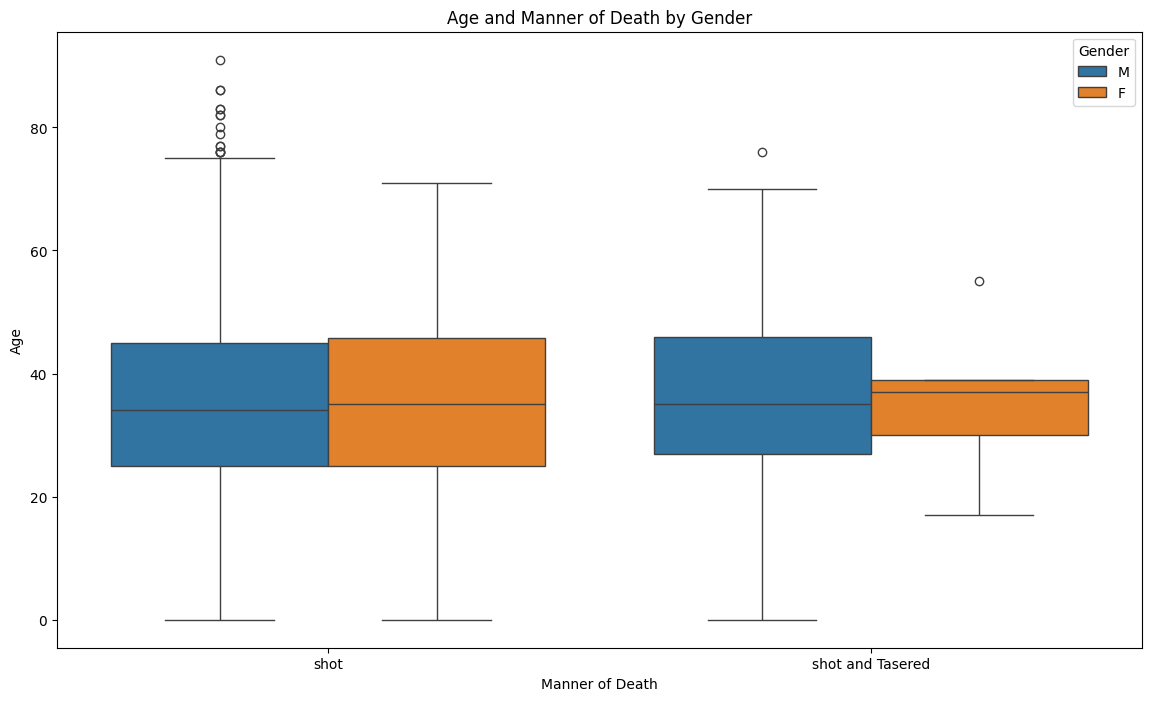

In [40]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="manner_of_death", y="age", hue="gender", data=df_fatalities)
plt.title("Age and Manner of Death by Gender")
plt.xlabel("Manner of Death")
plt.ylabel("Age")
plt.legend(title="Gender")
plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?


In [41]:
# Calculate the percentage of people armed
armed_counts = df_fatalities["armed"].value_counts(normalize=True) * 100

# Create a bar chart showing the type of weapon the deceased was carrying
fig = px.bar(
    armed_counts,
    x=armed_counts.index,
    y=armed_counts.values,
    title="Percentage of Police Killings by Weapon Type",
    labels={"index": "Weapon Type", "y": "Percentage"},
    height=600,
)

fig.show()

In [43]:
# Calculate the number of people armed with guns versus unarmed
gun_vs_unarmed_counts = (
    df_fatalities["armed"]
    .astype(str)
    .apply(lambda x: "gun" if "gun" in x else "unarmed" if x == "unarmed" else "other")
    .value_counts()
)

# Create a bar chart for gun vs unarmed
fig = px.bar(
    gun_vs_unarmed_counts,
    x=gun_vs_unarmed_counts.index,
    y=gun_vs_unarmed_counts.values,
    title="Number of People Killed by Police: Gun vs Unarmed",
    labels={"index": "Category", "y": "Number of Deaths"},
    height=600,
)

fig.show()

# How Old Were the People Killed?


Work out what percentage of people killed were under 25 years old.


In [44]:
# Calculate the number of people killed who were under 25 years old
under_25_count = df_fatalities[df_fatalities['age'] < 25].shape[0]

# Calculate the total number of people killed
total_count = df_fatalities.shape[0]

# Calculate the percentage
percentage_under_25 = (under_25_count / total_count) * 100

print(f"Percentage of people killed who were under 25 years old: {percentage_under_25:.2f}%")

Percentage of people killed who were under 25 years old: 20.79%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.


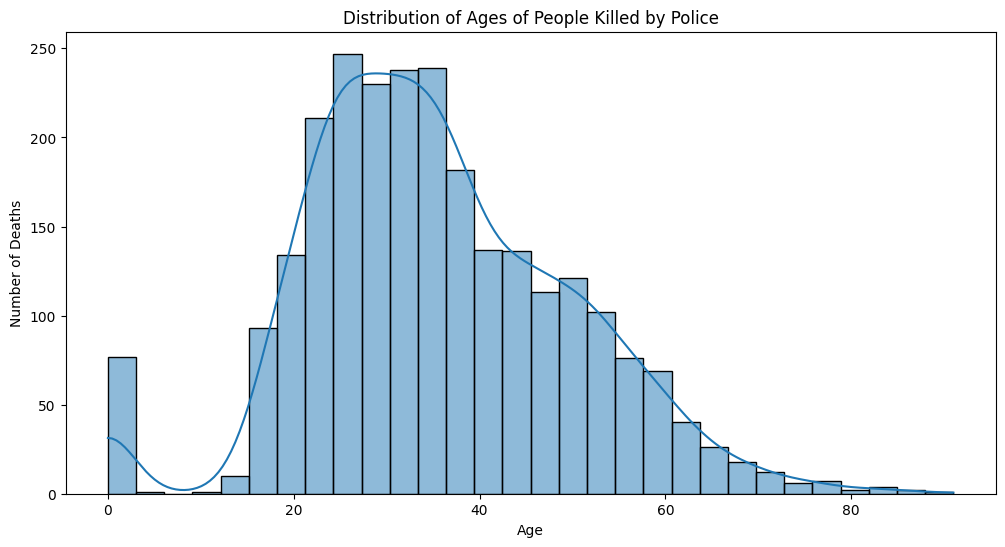

In [46]:
plt.figure(figsize=(12, 6))
sns.histplot(df_fatalities["age"], kde=True, bins=30)
plt.title("Distribution of Ages of People Killed by Police")
plt.xlabel("Age")
plt.ylabel("Number of Deaths")
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?


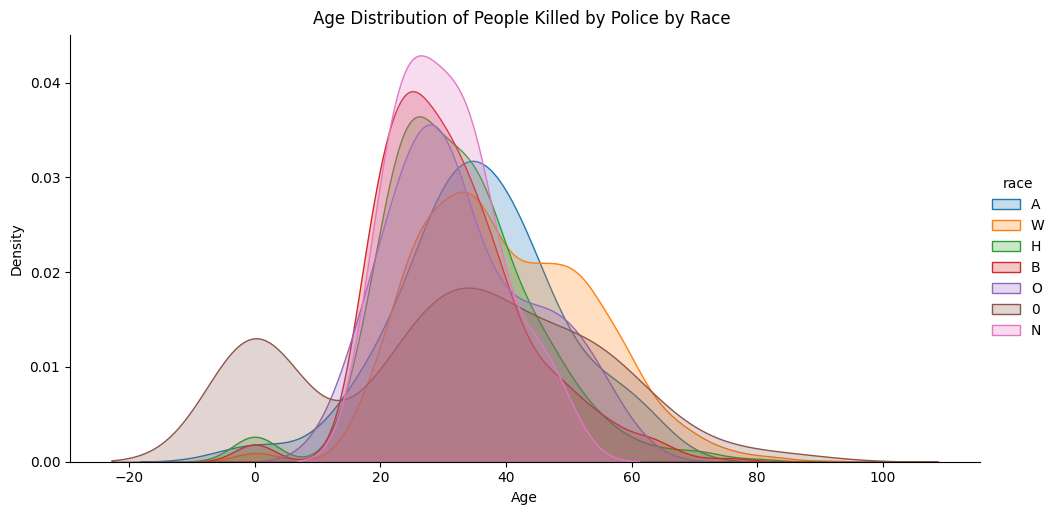

In [49]:
# Create a FacetGrid for KDE plots by race
g = sns.FacetGrid(df_fatalities, hue="race", height=5, aspect=2)
g.map(sns.kdeplot, "age", fill=True).add_legend()

# Set titles and labels
g.figure.suptitle("Age Distribution of People Killed by Police by Race", y=1.02)
g.set_axis_labels("Age", "Density")

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.


In [50]:
# Create the bar chart
fig = px.bar(
    race_counts,
    x=race_counts.index,
    y=race_counts.values,
    title="Total Number of People Killed by Race",
    labels={"index": "Race", "y": "Number of Deaths"},
    height=600,
)

fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?


In [51]:
# Calculate the number of people with signs of mental illness
mental_illness_count = df_fatalities[df_fatalities["signs_of_mental_illness"] == True].shape[0]

# Calculate the percentage
percentage_mental_illness = (mental_illness_count / total_count) * 100

print(f"Percentage of people killed by police with signs of mental illness: {percentage_mental_illness:.2f}%")

Percentage of people killed by police with signs of mental illness: 24.97%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?


In [52]:
# Count the number of police killings per city
city_killings = df_fatalities["city"].value_counts().head(10)

# Create the bar chart
fig = px.bar(
    city_killings,
    x=city_killings.index,
    y=city_killings.values,
    title="Top 10 Cities with the Most Police Killings",
    labels={"index": "City", "y": "Number of Killings"},
    height=600,
)

fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.


In [66]:
# Filter the df_share_race_city DataFrame to include only the top 10 cities with the most police killings
top_10_cities = city_killings.index
df_top_10_cities_race_share = df_share_race_city[df_share_race_city["City"].isin(top_10_cities)]

# Group by city and calculate the mean share of each race
city_race_share = df_top_10_cities_race_share.groupby("City").agg({
    "share_white": "mean",
    "share_black": "mean",
    "share_native_american": "mean",
    "share_asian": "mean",
    "share_hispanic": "mean"
}).reset_index()

# Merge the city_race_share with city_killings to get the number of killings in each city
city_race_share = city_race_share.merge(city_killings.rename_axis('City').reset_index(), on="City")
city_race_share.rename(columns={"count": "Number of Killings"}, inplace=True)

# Calculate the rate at which people are killed by race for each city
for race in [
    "share_white",
    "share_black",
    "share_native_american",
    "share_asian",
    "share_hispanic",
]:
    city_race_share[f"kill_rate_{race}"] = (
        city_race_share["Number of Killings"] / city_race_share[race]
    )

# Display the result
city_race_share

,City,share_white,share_black,share_native_american,share_asian,share_hispanic,Number of Killings,kill_rate_share_white,kill_rate_share_black,kill_rate_share_native_american,kill_rate_share_asian,kill_rate_share_hispanic


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?


In [67]:
# Aggregate the number of police killings by state
state_killings = df_fatalities["state"].value_counts().reset_index()
state_killings.columns = ["state", "killings"]

# Create the choropleth map
fig = px.choropleth(
    state_killings,
    locations="state",
    locationmode="USA-states",
    color="killings",
    scope="usa",
    title="Police Killings by US State",
    labels={"killings": "Number of Killings"},
    color_continuous_scale="Reds",
)

fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?


In [68]:
# Convert the date column to datetime format
df_fatalities["date"] = pd.to_datetime(df_fatalities["date"], format="%d/%m/%y")

# Extract the year from the date column
df_fatalities["year"] = df_fatalities["date"].dt.year

# Group by year and count the number of killings
killings_per_year = df_fatalities.groupby("year").size().reset_index(name="killings")

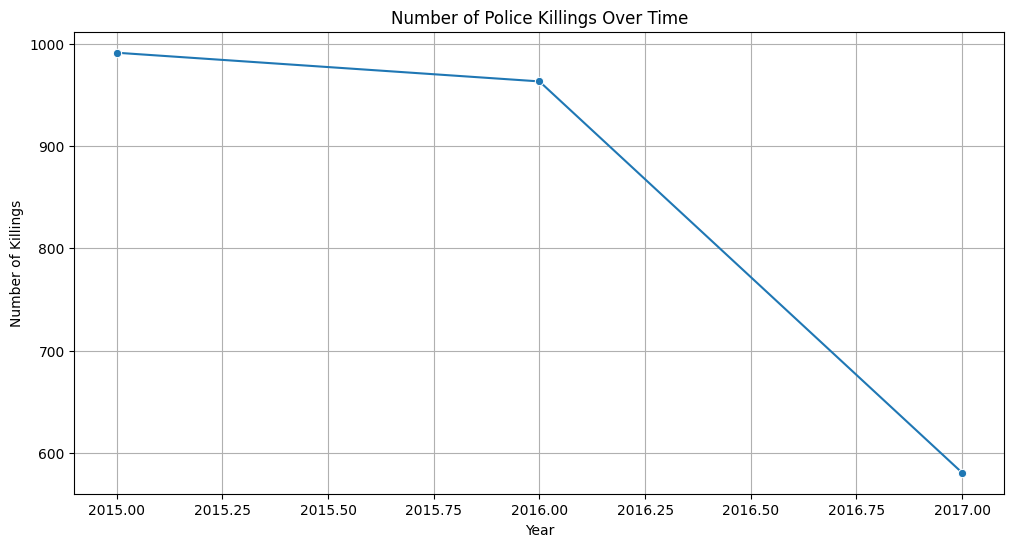

In [69]:
# Create the time series plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=killings_per_year, x="year", y="killings", marker="o")
plt.title("Number of Police Killings Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Killings")
plt.grid(True)
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).
